<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         723 non-null    int64 
 1   Gender                      723 non-null    object
 2   Education                   723 non-null    object
 3   City                        723 non-null    object
 4   FavoriteTourismDest_india   723 non-null    object
 5   FavoriteTourismDest_abroad  723 non-null    object
dtypes: int64(1), object(5)
memory usage: 34.0+ KB
None
              Age
count  723.000000
mean    27.549101
std      4.048016
min     18.000000
25%     25.000000
50%     27.000000
75%     31.000000
max     40.000000
Age                           0
Gender                        0
Education                     0
City                          0
FavoriteTourismDest_india     0
FavoriteTourismDest_abroad    0
dtype: int64


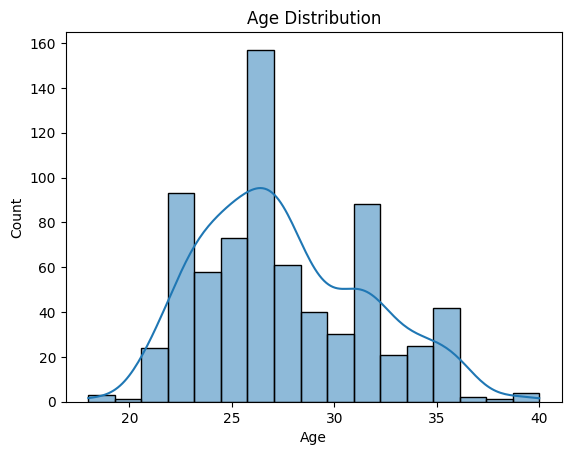

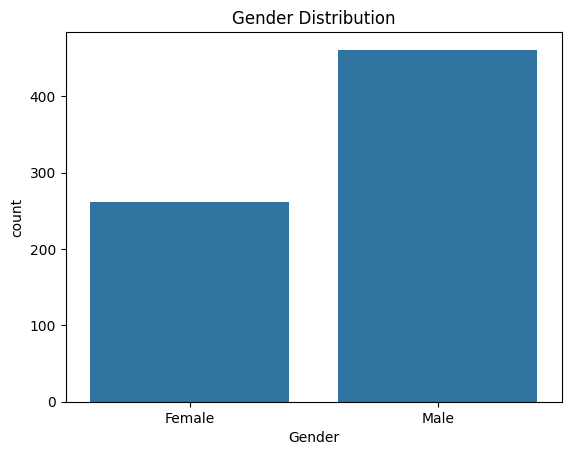

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


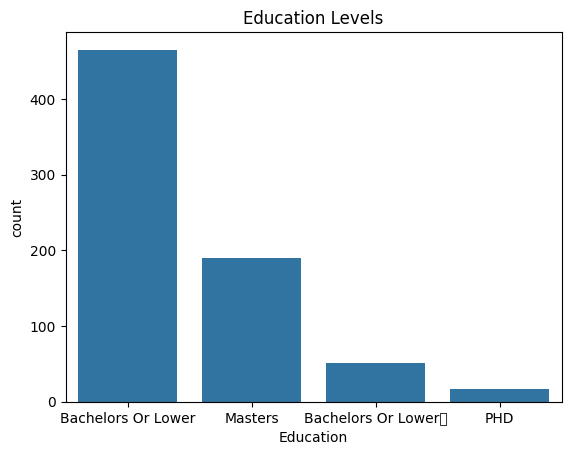

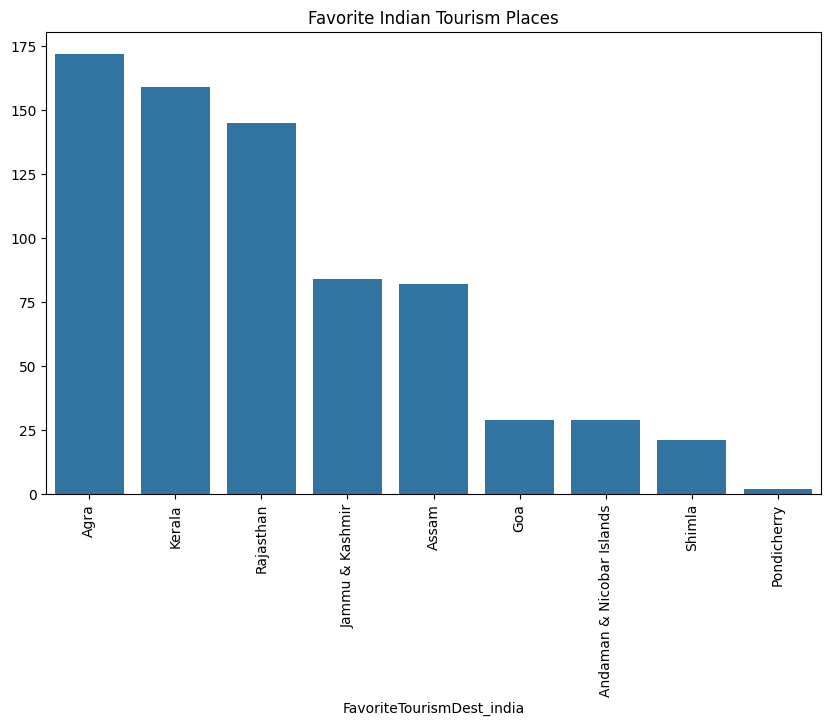

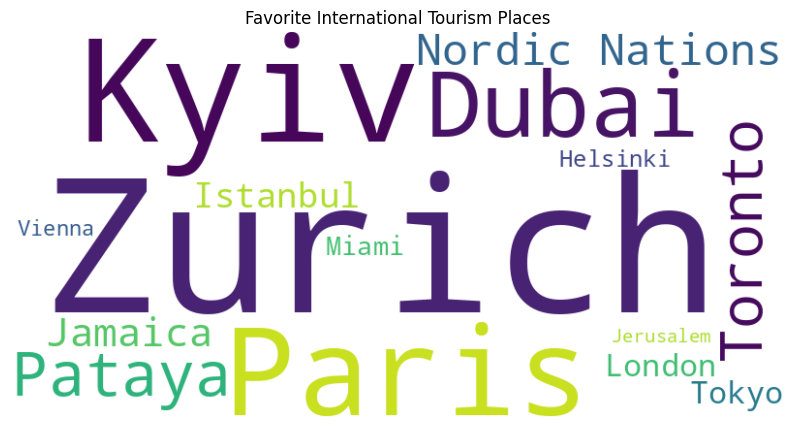

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

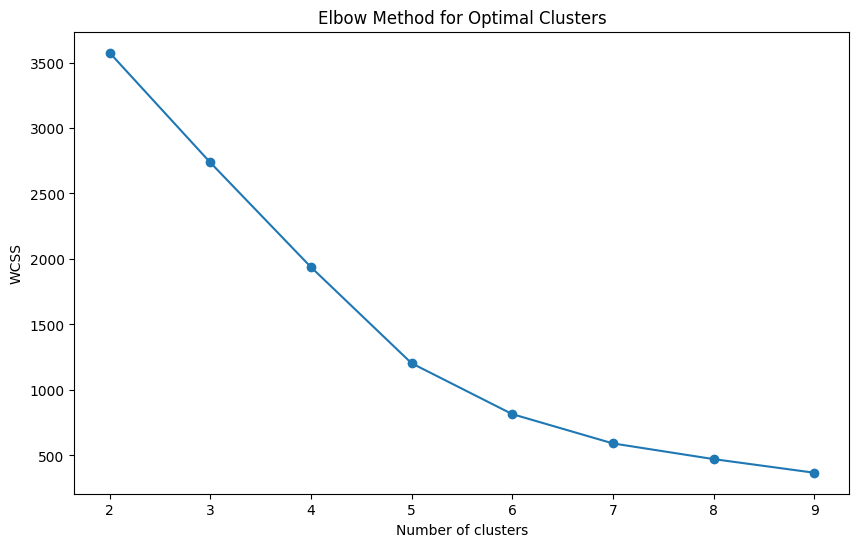

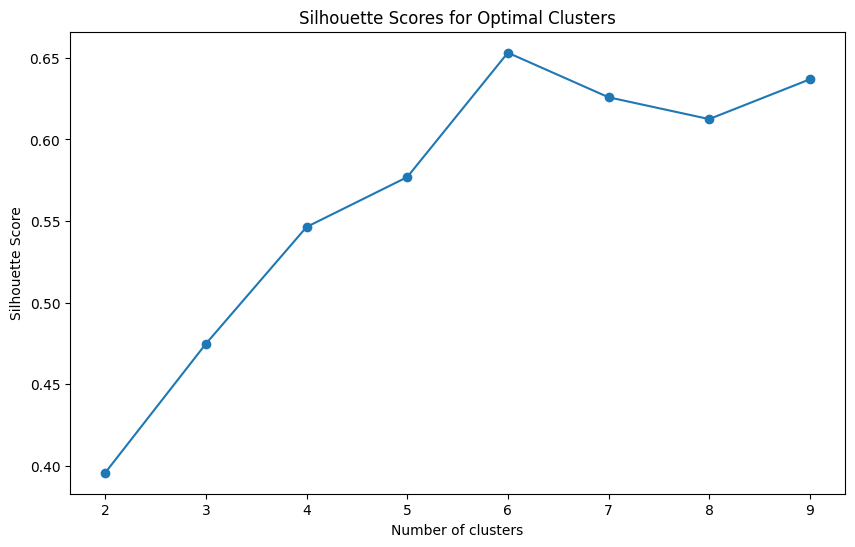

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


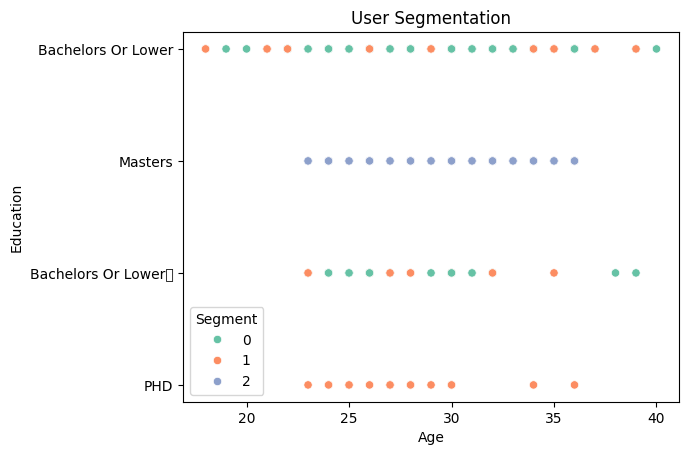

               Age
Segment           
0        27.183673
1        27.842105
2        27.915789
Segment 0:
Favorite Indian Tourism Destinations:
FavoriteTourismDest_india
Kerala                       112
Rajasthan                     98
Jammu & Kashmir               56
Agra                          56
Andaman & Nicobar Islands     19
Pondicherry                    2
Name: count, dtype: int64

Favorite International Tourism Destinations:
FavoriteTourismDest_abroad
Zurich            161
Kyiv               60
Pataya             41
Dubai              25
Nordic Nations     14
Paris              10
Istanbul           10
Helsinki            6
Miami               6
Vienna              5
Jerusalem           4
Jamaica             1
Name: count, dtype: int64

Segment 1:
Favorite Indian Tourism Destinations:
FavoriteTourismDest_india
Assam                        53
Kerala                       47
Rajasthan                    36
Agra                         24
Jammu & Kashmir              22
Andaman

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Travel/TravelChoices.csv')

# Data Exploration
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Handling Missing Data
# Drop rows with missing values or impute them
df.dropna(inplace=True)

# Demographic Analysis
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

sns.countplot(x='Education', data=df)
plt.title('Education Levels')
plt.show()

# Analyzing Favorite Indian Tourism Places
indian_places = df['FavoriteTourismDest_india'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=indian_places.index, y=indian_places.values)
plt.xticks(rotation=90)
plt.title('Favorite Indian Tourism Places')
plt.show()

# WordCloud for Favorite International Places
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['FavoriteTourismDest_abroad']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Favorite International Tourism Places')
plt.show()

# Segmentation using K-means
features = ['Age', 'Gender', 'Education']  # Convert categorical data to numerical before clustering
df_encoded = pd.get_dummies(df[features])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded)

# Optimizing Number of Clusters using Elbow Method and Silhouette Score
wcss = []
silhouette_scores = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K, wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Plotting Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Based on the above analysis, choose the optimal number of clusters
optimal_clusters = 3  # Replace with your optimal number based on the above plots
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Segment'] = kmeans.fit_predict(scaled_features)

# Visualizing Segments
sns.scatterplot(x='Age', y='Education', hue='Segment', data=df, palette='Set2')
plt.title('User Segmentation')
plt.show()

# Insights & Recommendations
# For example, you can generate insights based on segments
# Segment 0 might represent younger travelers preferring domestic tourism
# Segment 1 might represent older travelers with a preference for international travel

# Grouping by segments and calculating the mean for numeric columns only
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
segment_summary = df.groupby('Segment')[numeric_columns].mean()
print(segment_summary)

# Analyze the preferences of each segment
for segment in range(optimal_clusters):
    print(f"Segment {segment}:")
    print("Favorite Indian Tourism Destinations:")
    print(df[df['Segment'] == segment]['FavoriteTourismDest_india'].value_counts())
    print("\nFavorite International Tourism Destinations:")
    print(df[df['Segment'] == segment]['FavoriteTourismDest_abroad'].value_counts())
    print()

